# 01- 10 Linear Regression Model

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('/content/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Linear Regression model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
    test_smape = 100 * np.mean(2 * np.abs(test_predictions - y_test) / (np.abs(y_test) + np.abs(test_predictions)))
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Print evaluation metrics, execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"\nLinear Regression Model:")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")
    print(f"Train RMSE: {train_rmse:.5f}")
    print(f"Test RMSE: {test_rmse:.5f}")
    print(f"Train MAE: {train_mae:.5f}")
    print(f"Test MAE: {test_mae:.5f}")
    print(f"Train SMAPE: {train_smape:.5f}")
    print(f"Test SMAPE: {test_smape:.5f}")
    print(f"Train R2: {train_r2:.5f}")
    print(f"Test R2: {test_r2:.5f}")

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Linear Regression model
start_time = time.time()
train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)
computation_time = time.time() - start_time

# Print computation time
print(f"Execution Time: {computation_time:.5f} seconds")

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Linear Regression Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


UnicodeDecodeError: ignored

# 02-10 - SVR


SVR Model:
Execution Time: 0.00543 seconds
CPU Usage: 16.60000 MHz
Memory Used: 179.03906 MB
Train RMSE: 29.50432
Test RMSE: 29.70786
Train MAE: 22.48285
Test MAE: 27.70635
Train SMAPE: 40.52867
Test SMAPE: 137.19553
Train R2: 0.80066
Test R2: -5.01204


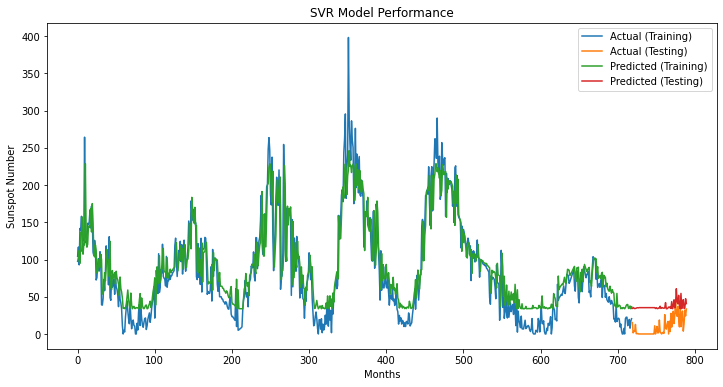

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the SVR model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the SVR model
    model = SVR()
    model.fit(X_train, y_train.ravel())

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
    test_smape = 100 * np.mean(2 * np.abs(test_predictions - y_test) / (np.abs(y_test) + np.abs(test_predictions)))
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Print evaluation metrics, execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print("\nSVR Model:")
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")
    print(f"Train RMSE: {train_rmse:.5f}")
    print(f"Test RMSE: {test_rmse:.5f}")
    print(f"Train MAE: {train_mae:.5f}")
    print(f"Test MAE: {test_mae:.5f}")
    print(f"Train SMAPE: {train_smape:.5f}")
    print(f"Test SMAPE: {test_smape:.5f}")
    print(f"Train R2: {train_r2:.5f}")
    print(f"Test R2: {test_r2:.5f}")

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the SVR model
start_time = time.time()
train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)
computation_time = time.time() - start_time

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('SVR Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 03- 10 - AdaBoost

C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoost Model:
Train RMSE: 26.18211
Test RMSE: 14.50597

Train MAE: 19.19019
Test MAE: 13.15900
Train SMAPE: 33.72639
Test SMAPE: 122.97327
Train R2: 0.84303
Test R2: -0.43342

System Information:
Execution Time: 0.03693 seconds
CPU Usage: 14.4 MHz
Memory Used: 16842.95 MB



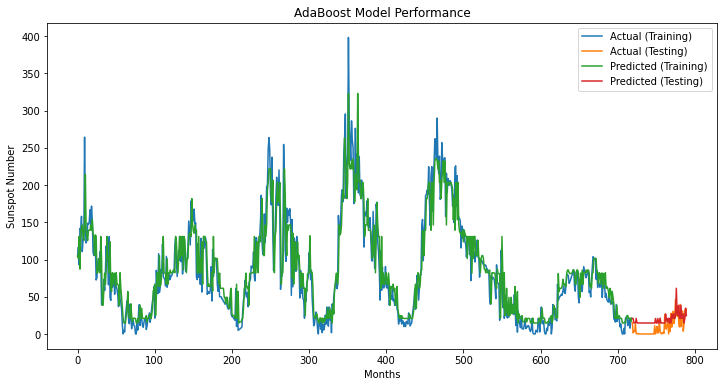

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import psutil
import time

# Set a random seed for reproducibility
np.random.seed(42)


# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the AdaBoost model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the AdaBoost model
    base_estimator = DecisionTreeRegressor(max_depth=4)  # Base estimator
    model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate additional evaluation metrics
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
    test_smape = 100 * np.mean(2 * np.abs(test_predictions - y_test) / (np.abs(y_test) + np.abs(test_predictions)))
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the AdaBoost model
start_time = time.time()
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)
end_time = time.time()
execution_time = end_time - start_time

# Calculate CPU usage and memory usage
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results and plot the predictions
print("AdaBoost Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print()
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.1f} MHz")
print(f"Memory Used: {memory_usage:.2f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('AdaBoost Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 04- 10 : Stacked LSTM Model

3/3 [==============================] - 0s 3ms/step
Stacked LSTM Model:
Train RMSE: 27.86657
Test RMSE: 12.13082
Train MAE: 18.96457
Test MAE: 9.07769
Train SMAPE: 16.91354
Test SMAPE: 61.44540
Train R2: 0.82218
Test R2: -0.00244

System Information:
Execution Time: 11.38986 seconds
CPU Usage: 18.90000 MHz
Memory Used: 17108.06250 MB



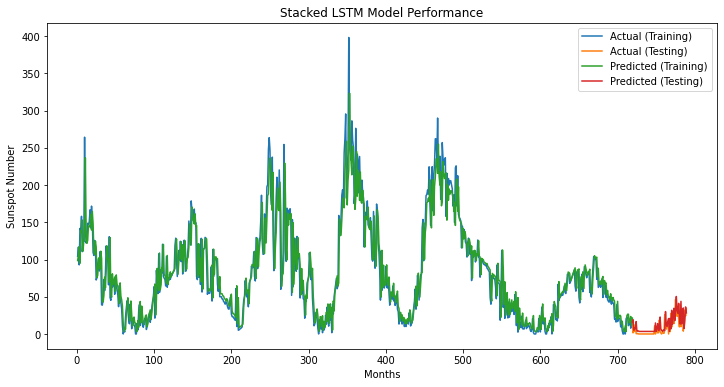

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import psutil
import time

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Stacked LSTM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the Stacked LSTM model
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(1, 1)))
    model.add(LSTM(64))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the Stacked LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Measure execution time
start_time = time.time()

# Train and evaluate the Stacked LSTM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Calculate execution time
execution_time = time.time() - start_time

# Get system information
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results
print("Stacked LSTM Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Stacked LSTM Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 05- 10 LSTM

3/3 [==============================] - 0s 2ms/step
LSTM Model:
Train RMSE: 28.01383
Test RMSE: 12.47676
Train MAE: 18.98527
Test MAE: 10.11959
Train SMAPE: 16.69213
Test SMAPE: 61.22538
Train R2: 0.82029
Test R2: -0.06043

System Information:
Execution Time: 6.51294 seconds
CPU Usage: 17.20000 MHz
Memory Used: 16999.05859 MB



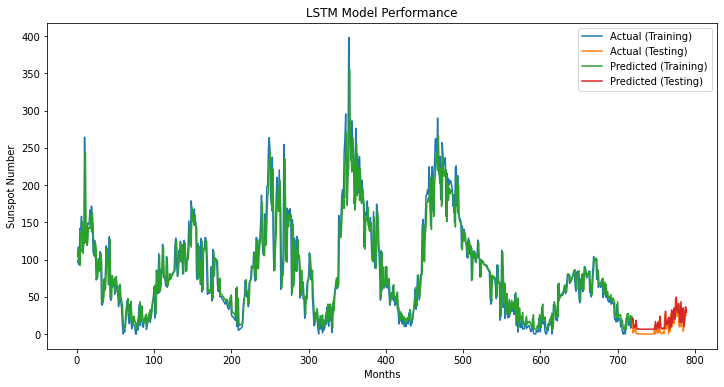

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import psutil
import time

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the LSTM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Measure execution time
start_time = time.time()

# Train and evaluate the LSTM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Calculate execution time
execution_time = time.time() - start_time

# Get system information
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results
print("LSTM Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('LSTM Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 06- 10 : Bidirectional LSTM Model

3/3 [==============================] - 0s 2ms/step
Bidirectional LSTM Model:
Train RMSE: 27.95637
Test RMSE: 12.14452
Train MAE: 18.89120
Test MAE: 9.55187
Train SMAPE: 16.67217
Test SMAPE: 61.34708
Train R2: 0.82103
Test R2: -0.00471

System Information:
Execution Time: 9.85513 seconds
CPU Usage: 16.80000 MHz
Memory Used: 17088.28516 MB



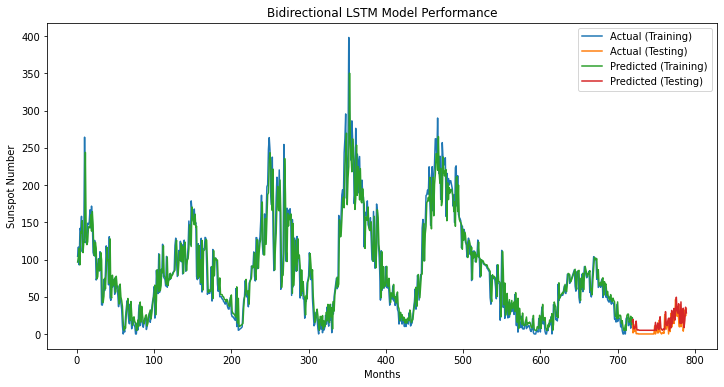

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
import psutil
import time

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Bidirectional LSTM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build the Bidirectional LSTM model
    model = Sequential()
    model.add(Bidirectional(LSTM(64), input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the Bidirectional LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Measure execution time
start_time = time.time()

# Train and evaluate the Bidirectional LSTM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Calculate execution time
execution_time = time.time() - start_time

# Get system information
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results
print("Bidirectional LSTM Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Bidirectional LSTM Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 07 - 10 GRU Model

3/3 [==============================] - 0s 2ms/step
GRU Model:
Train RMSE: 27.99825
Test RMSE: 12.05731
Train MAE: 19.12384
Test MAE: 8.35361
Train SMAPE: 17.50407
Test SMAPE: 62.65205
Train R2: 0.82049
Test R2: 0.00967
Computation Time: 10.60673 seconds
CPU Usage: 21.30 MHz
Memory Used: 17190.69 MB


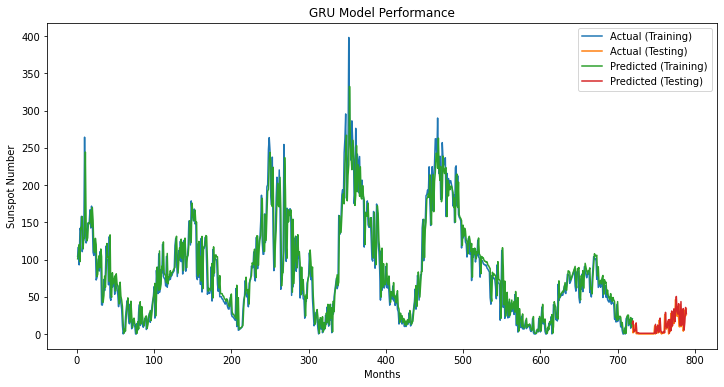

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import psutil

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the GRU model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for GRU
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the GRU model
    model = Sequential()
    model.add(GRU(64, input_shape=(1, 1), return_sequences=True))
    model.add(GRU(64))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the GRU model
    start_time = time.time()
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    end_time = time.time()
    computation_time = end_time - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the GRU model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("GRU Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print(f"Computation Time: {computation_time:.5f} seconds")

# Measure CPU usage and memory usage
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / (1024 * 1024)  # in MB

print(f"CPU Usage: {cpu_usage:.2f} MHz")
print(f"Memory Used: {memory_usage:.2f} MB")

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('GRU Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 08 - 10 GBM Model

C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Gradient Boosting Machines (GBM) Model:
Train RMSE: 22.64418
Test RMSE: 12.73982
Train MAE: 15.92189
Test MAE: 11.19859
Train SMAPE: 15.11292
Test SMAPE: 61.81399
Train R2: 0.88258
Test R2: -0.10562
Computation Time: 0.04492 seconds

CPU Usage: 13.40000 MHz
Memory Used: 17214.14062 MB



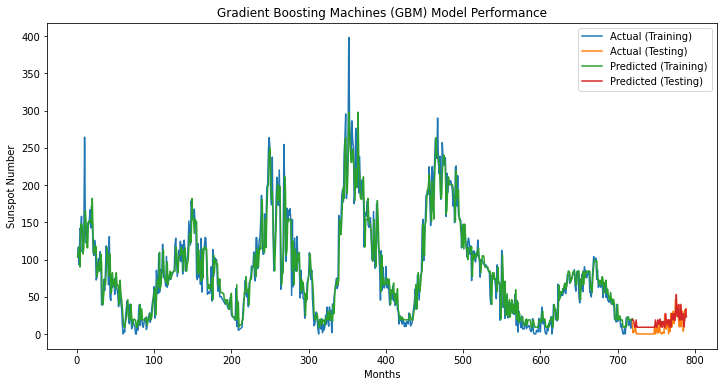

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import psutil

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the GBM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the GBM model
    start_time = time.time()
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    end_time = time.time()
    computation_time = end_time - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the GBM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("Gradient Boosting Machines (GBM) Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print(f"Computation Time: {computation_time:.5f} seconds")
print()

# Measure CPU usage and memory usage
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / (1024 * 1024)  # in MB

print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Gradient Boosting Machines (GBM) Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 09 - 10 RF Model

C:\Users\Storm\AppData\Local\Temp/ipykernel_20364/1484956947.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest Model:
Train RMSE: 16.43484
Test RMSE: 13.57460
Train MAE: 11.53019
Test MAE: 11.32157
Train SMAPE: 23.69960
Test SMAPE: 129.43665
Train R2: 0.93815
Test R2: -0.25526
Computation Time: 0.13363 seconds

CPU Usage: 17.30000 MHz
Memory Used: 17201.19922 MB



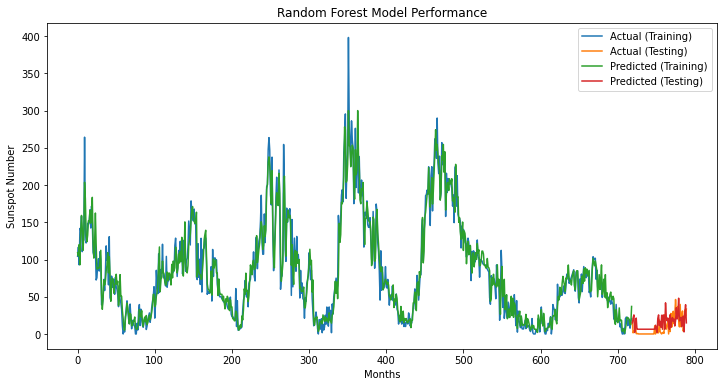

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import psutil

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Random Forest model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    start_time = time.time()
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    end_time = time.time()
    computation_time = end_time - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / ((y_train + train_predictions) / 2))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / ((y_test + test_predictions) / 2))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Random Forest model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("Random Forest Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print(f"Computation Time: {computation_time:.5f} seconds")
print()

# Measure CPU usage and memory usage
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / (1024 * 1024)  # in MB

print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Random Forest Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 10 - 10 ETS

C:\Users\Storm\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


ETS Model:
Train RMSE: 25.83712
Test RMSE: 14.25583
Train MAE: 18.01361
Test MAE: 11.59302
Train SMAPE: 16.93005
Test SMAPE: 66.68397
Train R2: 0.84693
Test R2: -0.40320

System Information:
Execution Time: 0.21343 seconds
CPU Usage: 11.60000 MHz
Memory Used: 16938.83203 MB



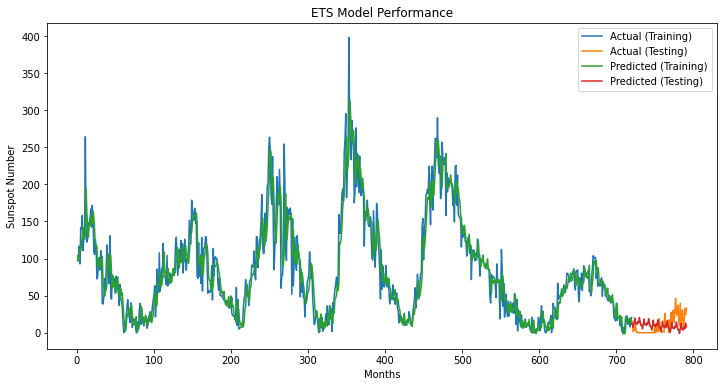

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import psutil
import time

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number']

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the ETS model
def train_evaluate_model(train_data, test_data):
    # Fit the ETS model
    model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
    start_time = time.time()
    model_fit = model.fit()
    end_time = time.time()
    execution_time = end_time - start_time

    # Make predictions
    train_predictions = model_fit.predict(start=0, end=len(train_data) - 1)
    test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(train_data.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(test_data.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, execution_time, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the ETS model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, execution_time, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Calculate CPU usage and memory usage
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results
print("ETS Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('ETS Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()
